In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json

In [12]:
df = pd.read_csv("USvideos.csv")
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)
print(df.head())
print("Numeric and boolean columns:", numeric_bool_cols)

      video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   lik

In [13]:
numeric_bool_cols = ['category_id', 'views', 'likes', 'dislikes', 'comment_count',
                     'comments_disabled', 'ratings_disabled', 'video_error_or_removed']

df_numeric_bool = df.loc[:, numeric_bool_cols]
print(df_numeric_bool.head())


   category_id    views   likes  dislikes  comment_count  comments_disabled  \
0           22   748374   57527      2966          15954              False   
1           24  2418783   97185      6146          12703              False   
2           23  3191434  146033      5339           8181              False   
3           24   343168   10172       666           2146              False   
4           24  2095731  132235      1989          17518              False   

   ratings_disabled  video_error_or_removed  
0             False                   False  
1             False                   False  
2             False                   False  
3             False                   False  
4             False                   False  


In [5]:
df["description"] = df["description"].fillna(value="")
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.00,40949.00,40949.00,40949.00,40949.00
mean,19.97,2360784.64,74266.70,3711.40,8446.80
std,7.57,7394113.76,228885.34,29029.71,37430.49
min,1.00,549.00,0.00,0.00,0.00
25%,17.00,242329.00,5424.00,202.00,614.00
50%,24.00,681861.00,18091.00,631.00,1856.00
75%,25.00,1823157.00,55417.00,1938.00,5755.00
max,43.00,225211923.00,5613827.00,1674420.00,1361580.00


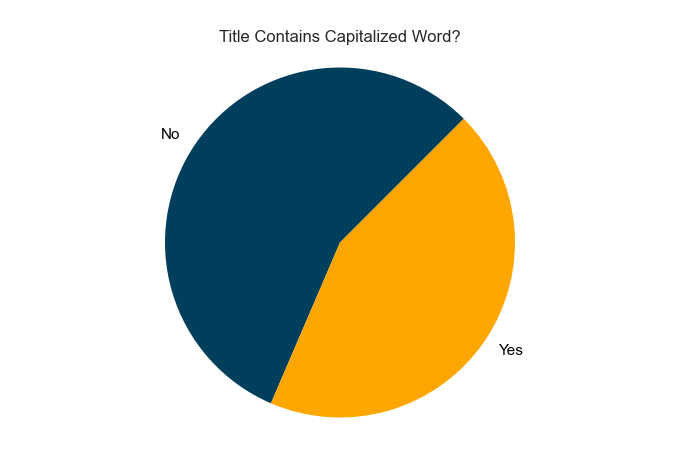

In [6]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

C:\Users\jkrid\AppData\Local\Temp\ipykernel_22912\2709487885.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(df["title_length"], kde=False, rug=False,


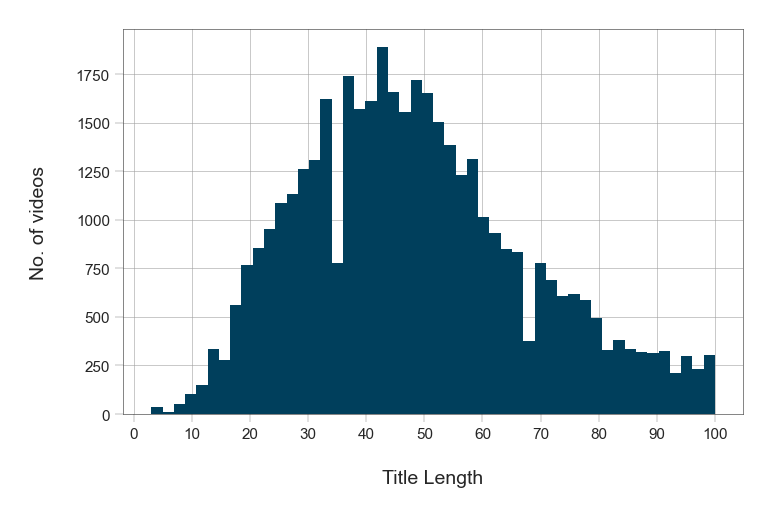

In [7]:
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

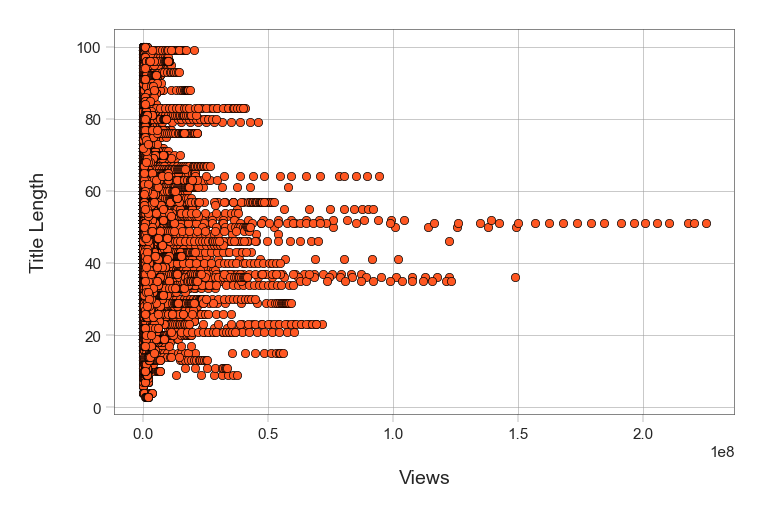

In [8]:

fig, ax = plt.subplots()
_ = ax.scatter(x=df['views'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

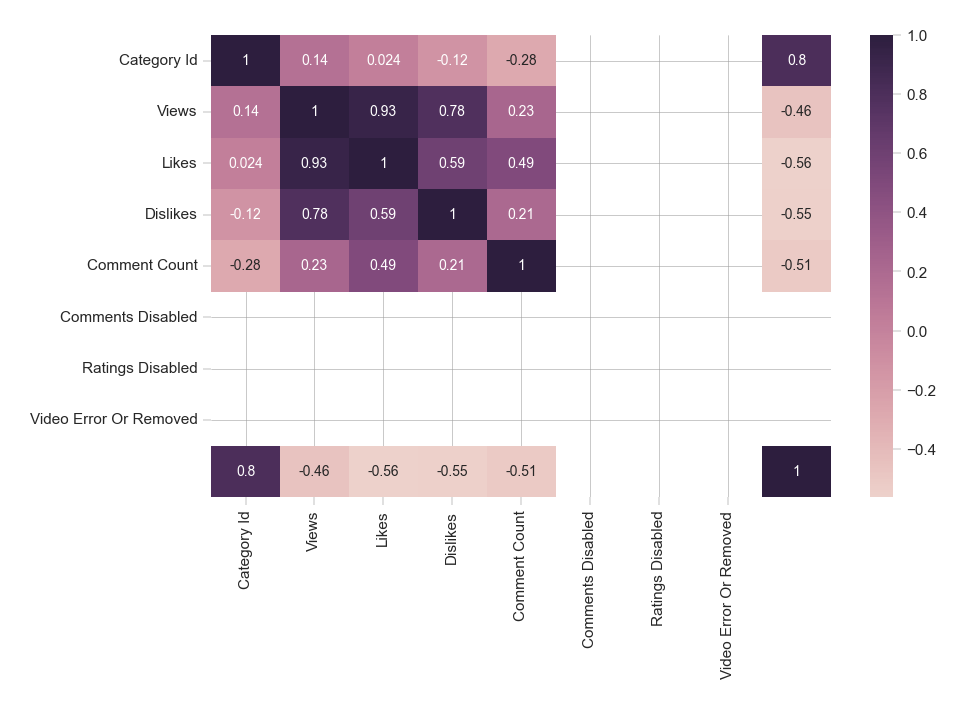

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Example DataFrame with initial data
df = pd.DataFrame({
    'category_id': [22, 24, 23, 24, 24],
    'views': [748374, 2418783, 3191434, 343168, 2095731],
    'likes': [57527, 97185, 146033, 10172, 132235],
    'dislikes': [2966, 6146, 5339, 666, 1989],
    'comment_count': [15954, 12703, 8181, 2146, 17518],
    'comments_disabled': [False, False, False, False, False],
    'ratings_disabled': [False, False, False, False, False],
    'video_error_or_removed': [False, False, False, False, False]
})

# Example categorical column
df['category_col'] = ['A', 'B', 'A', 'C', 'B']

# Label encode categorical column
label_encoder = LabelEncoder()
df['category_col_encoded'] = label_encoder.fit_transform(df['category_col'])

# Select numeric and boolean columns
numeric_bool_cols = df.select_dtypes(include=['number', 'bool']).columns

# Generate human-readable labels excluding 'category_col' and 'category_col_encoded'
h_labels = [x.replace('_', ' ').title() for x in numeric_bool_cols if x not in ['category_col', 'category_col_encoded']]

# Plot the heatmap
fig, ax = plt.subplots(figsize=(10, 6))
_ = sns.heatmap(df[numeric_bool_cols].corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

plt.show()


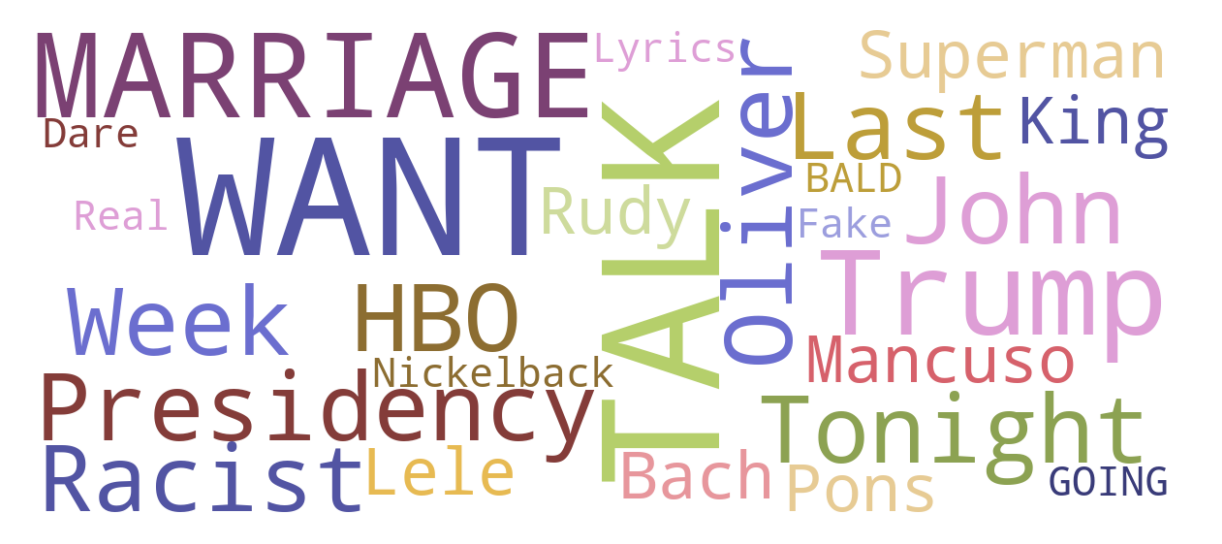

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Example DataFrame (replace with your actual DataFrame loading method)
df = pd.DataFrame({
    'title': ['WE WANT TO TALK ABOUT OUR MARRIAGE',
              'The Trump Presidency: Last Week Tonight with John Oliver (HBO)',
              'Racist Superman | Rudy Mancuso, King Bach & Lele Pons',
              'Nickelback Lyrics: Real or Fake?',
              'I Dare You: GOING BALD!?']
})

# Check if 'title' exists in DataFrame
if 'title' in df.columns:
    # Process the titles
    title_words = list(df["title"].apply(lambda x: x.split()))
    title_words = [x for y in title_words for x in y]
    
    # Generate word cloud
    wc = WordCloud(width=1200, height=500, collocations=False, background_color="white", colormap="tab20b").generate(" ".join(title_words))
    
    # Plot word cloud
    plt.figure(figsize=(15,10))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
else:
    print("Column 'title' does not exist in the DataFrame.")
